In [42]:
# Import libraries 
import statsmodels

import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing the dataframe

df= pd.read_csv('car-mpg.csv')
df.head()


,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [3]:
df.shape

(398, 10)

In [4]:
df.info() # car_name is object type rest are numerical columns.
# here we have to change the hp to int type as its anumerical column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_type  398 non-null    int64  
 9   car_name  398 non-null    object 
dtypes: float64(3), int64(5), object(2)
memory usage: 31.2+ KB


In [5]:
df[df['hp']=='?'] #'?' it has to be replaced by its median.

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
32,25.0,4,98.0,?,2046,19.0,71,1,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,0,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,1,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,1,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,1,amc concord dl


In [6]:
# replacing the '?' values with mediam.
df['hp']= df['hp'].replace('?',np.nan)


In [7]:
df['hp']=df['hp'].fillna(df['hp'].median()) # here we have replaced the nan values with its median 

In [8]:
df['hp']=df['hp'].astype('float') # changing datatype from obhect to float

In [9]:
df.info()   # here you can see we have converted the dattype sucessfully.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    float64
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_type  398 non-null    int64  
 9   car_name  398 non-null    object 
dtypes: float64(4), int64(5), object(1)
memory usage: 31.2+ KB


In [10]:
df.describe(include=np.number).T   # Data Summary

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,104.304020,38.222625,46.0,76.000,93.5,125.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0
car_type,398.0,0.530151,0.499718,0.0,0.000,1.0,1.000,1.0


In [11]:
df['origin'].value_counts() 
# Replace 1: 'america', 2: europe, 3: asia

1    249
3     79
2     70
Name: origin, dtype: int64

In [12]:
# Replacig the origin column.
df['origin']=df['origin'].replace({ 1: 'america', 2: 'europe', 3: 'asia'},regex=True)

In [13]:
df['origin'].value_counts() # After replaceing the origin column.

america    249
asia        79
europe      70
Name: origin, dtype: int64

In [14]:
newdf=pd.get_dummies(df, columns=['origin']) 
# here we have converted our dataset into newdf after creating dummy types for origin column

In [15]:
df

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,america,0,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,america,0,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,america,0,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,america,0,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,america,0,ford torino
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,america,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,1,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,america,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,america,1,ford ranger


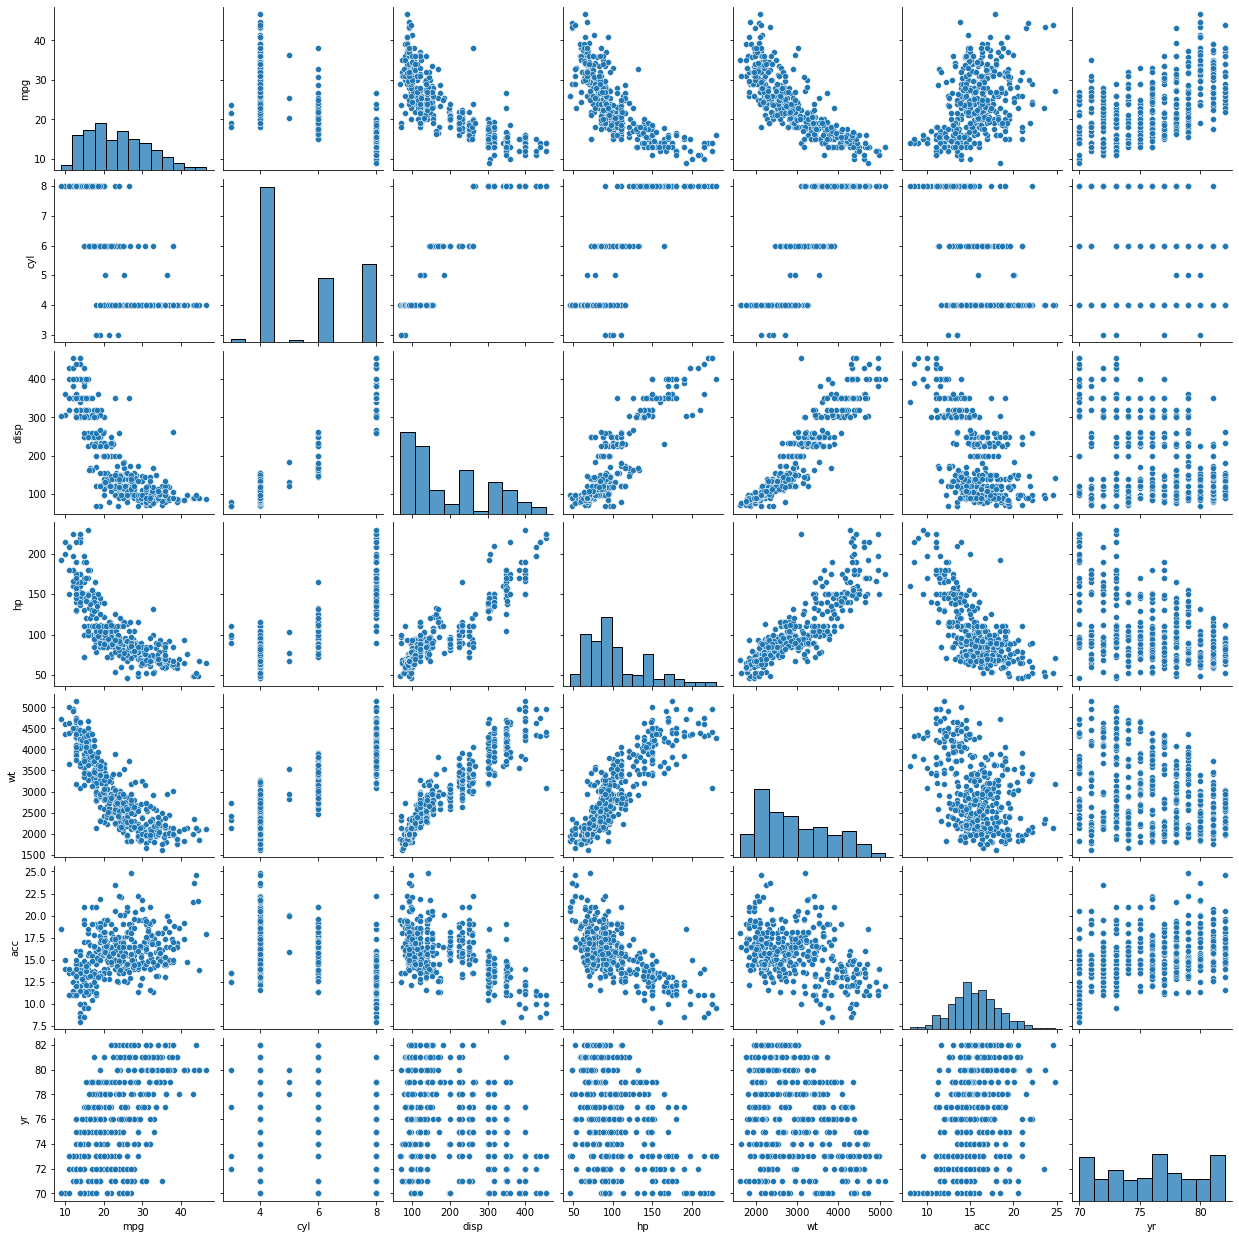

In [16]:
sns.pairplot(df[['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr']])

In [17]:
newdf= newdf.drop('car_name',axis=1)

* Seperate Independent and Dependent Variable

In [37]:
#Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it

x=newdf.drop('mpg',axis=1)

# the dependend variable alone 
y= newdf[['mpg']]  # we had made it into dataframe by [[]]

In [19]:
newdf.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'car_type',
       'origin_america', 'origin_asia', 'origin_europe'],
      dtype='object')

In [31]:
# we can see our data is skewed so we will do scaleing to reduce the skewnwss.
from sklearn import preprocessing
xscaled = preprocessing.scale(x)
x_scaled = pd.DataFrame(xscaled, columns=x.columns)  # ideally the training and test should be 

yscaled = preprocessing.scale(y)
y_scaled = pd.DataFrame(yscaled, columns=y.columns)

In [40]:
# splitting the data into using train_test_split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_scaled, y_scaled, test_size=0.30,random_state=1)

### Fit the simple linear Model

In [44]:
model= sm.OLS(ytrain,xtrain).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    mpg   R-squared (uncentered):                   0.834
Model:                            OLS   Adj. R-squared (uncentered):              0.828
Method:                 Least Squares   F-statistic:                              150.2
Date:                Wed, 09 Feb 2022   Prob (F-statistic):                    1.69e-99
Time:                        18:49:55   Log-Likelihood:                         -147.20
No. Observations:                 278   AIC:                                      312.4
Df Residuals:                     269   BIC:                                      345.0
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
cyl                0.3179      0.112      2.832      0.005       0.097       0.539
disp               0.3257      0.128      2.552      0.011       0.074       0.577
hp                -0.2285      0.079     -2.909      0.004      -0.383      -0.074
wt                -0.7117      0.088     -8.131      0.000      -0.884      -0.539
acc                0.0159      0.039      0.403      0.687      -0.062       0.093
yr                 0.3741      0.029     13.076      0.000       0.318       0.430
car_type           0.3801      0.067      5.714      0.000       0.249       0.511
origin_america    -0.0743      0.020     -3.707      0.000      -0.114      -0.035
origin_asia        0.0445      0.020      2.176      0.030       0.004       0.085
origin_europe      0.0479      0.021      2.250      0.025       0.006       0.090
==============================================================================
Omnibus:                       22.824   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.434
Skew:                           0.515   Prob(JB):                     1.23e-08
Kurtosis:                       4.444   Cond. No.                     2.08e+16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 3.61e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [70]:
lr= LinearRegression()
lr.fit(xtrain, ytrain)
print('LR Model coff',lr.coef_)

LR Model coff [[ 0.32102239  0.32483431 -0.2291695  -0.71121019  0.01471368  0.37558119
   0.38147695 -0.07472248  0.04451525  0.04834855]]


In [69]:
print('R Square for train set', lr.score(xtrain,ytrain))
print('R square for test set', lr.score(xtest,ytest))

R Square for train set 0.8343770256960538
R square for test set 0.8513421387780066


* Create a regularized RIDGE model and note the coefficients

In [51]:
ridge=Ridge(alpha=.3)
            
ridge.fit(xtrain, ytrain)
print("ridge Model",ridge.coef_)
print('column names', ridge.feature_names_in_)

ridge Model [[ 0.31649043  0.31320707 -0.22876025 -0.70109447  0.01295851  0.37447352
   0.37725608 -0.07423624  0.04441039  0.04784031]]
column names ['cyl' 'disp' 'hp' 'wt' 'acc' 'yr' 'car_type' 'origin_america'
 'origin_asia' 'origin_europe']


In [52]:
#Create a regularized LASSO model and note the coefficients
lasso= Lasso( alpha=0.1)
lasso.fit(xtrain,ytrain)
print('lasso model',lasso.coef_)
# here we can see that some of the independennt variables are given the weightage of 0.
#  many of the coefficients have become 0 indicating drop of those dimensions from the model

lasso model [-0.         -0.         -0.01690287 -0.51890013  0.          0.28138241
  0.1278489  -0.01642647  0.          0.        ]


In [58]:
# Let's compare the score by both 
print(ridge.score(xtest,ytest))
print(ridge.score(xtrain,ytrain)) #R2 for train and test by ridge

0.8518882171608506
0.8343617931312616


In [60]:
print(lasso.score(xtrain,ytrain))
print(lasso.score(xtest,ytest))

0.7938010766228453
0.8375229615977083


* More or less similar results but with less complex models.  Complexity is a function of variables and coefficients
* Note - with Lasso, we get equally good result in test though not so in training.  Further, the number of dimensions is much less in LASSO model than ridge or un-regularized model

##  Let us generate polynomial models reflecting the non-linear interaction between some dimensions

In [71]:
from sklearn.preprocessing import PolynomialFeatures

In [72]:
poly=PolynomialFeatures(degree=2,interaction_only=True) # polynomial feature=2

In [82]:
xpoly=poly.fit_transform(x_scaled)
xtrain, xtest,ytrain,ytest= train_test_split(xpoly, y, test_size=0.30,random_state=1)
xtrain.shape


(278, 56)

In [87]:
# now applying linear regression Model
lr=LinearRegression()
lr.fit(xtrain,ytrain)
print('R2 Score', lr.coef_)

R2 Score [[ 3.24082770e-13 -1.14204220e+12 -4.43738735e+00 -2.24947964e+00
  -2.98166341e+00 -1.56730367e+00  3.00442772e+00 -1.52060575e+12
  -7.80788356e+11  3.71375223e+12 -3.23609457e+12 -1.15918732e+00
  -1.43925476e+00 -3.57818604e-03  2.58444214e+00 -1.91918182e+00
  -3.65891647e+12 -6.45319147e+12 -2.39436996e+12 -2.28543203e+12
   3.90441895e-01  2.09503174e-01 -4.23446655e-01  3.58471680e+00
  -2.02703094e+00 -9.03672940e+11 -7.44778888e+11 -7.10893285e+11
   2.47772217e-01 -6.70440674e-01 -1.92620850e+00 -7.47558594e-01
  -2.15947171e+11 -1.77976884e+11 -1.69879374e+11 -1.72500610e-01
   5.30212402e-01 -3.32050323e+00  1.69388998e+12  1.39605098e+12
   1.33253411e+12  5.85876465e-01  1.53894043e+00  4.76389633e+11
   3.92625390e+11  3.74761903e+11  4.00207520e-01 -1.27131857e+10
  -1.04778089e+10 -1.00010944e+10 -1.09798815e+12  8.13175594e+11
   7.76178109e+11  2.20248210e+11 -5.15971535e+12  2.83957085e+12]]


In [94]:
print('Rsquare of train set', lr.score(xtrain,ytrain))
print('Rsquare of test set', lr.score(xtest,ytest))


Rsquare of train set 0.9148867502464537
Rsquare of test set 0.8582044437663947


In [90]:
# checking the cofficients via Ridge approch
ridge=Ridge(alpha=0.3,fit_intercept=True)
ridge.fit(xtrain,ytrain)
print(ridge.coef_)

[[ 0.          3.73512981 -2.93500874 -2.13974194 -3.56547812 -1.28898893
   3.01290805  2.04739082  0.0786974   0.21972225 -0.3302341  -1.46231096
  -1.17221896  0.00856067  2.48054694 -1.67596093  0.99537516 -2.29024279
   4.7699338  -2.08598898  0.34009408  0.35024058 -0.41761834  3.06970569
  -2.21649433  1.86339518 -2.62934278  0.38596397  0.12088534 -0.53440382
  -1.88265835 -0.7675926  -0.90146842  0.52416091  0.59678246 -0.26349448
   0.5827378  -3.02842915 -0.36548074  0.5956112  -0.15941014  0.49168856
   1.45652375 -0.43819158 -0.20964198  0.77665496  0.36489921 -0.4750838
   0.3551047   0.23188557 -1.42941282  2.06831543 -0.34986402 -0.32320394
   0.39054656  0.06283411]]


In [95]:
print('Rsquare of train set', ridge.score(xtrain,ytrain))
print('Rsquare of test set', ridge.score(xtest,ytest))


Rsquare of train set 0.9143225702003365
Rsquare of test set 0.861339805369854


In [91]:
# Checking the cofficient by lasso
lasso=Lasso(alpha=.1,fit_intercept=True)
lasso.fit(xtrain,ytrain)
print(lasso.coef_)

[ 0.         -0.         -0.         -1.59613165 -5.22452383 -0.
  2.86907439  0.03030592 -0.10514919  0.          0.         -0.
 -0.          0.          0.28971732 -0.          0.         -0.
  0.11457443 -0.          0.          1.15720495  0.          0.
 -0.          0.          0.         -0.          0.04724906  0.
 -0.6925298  -0.          0.          0.         -0.         -0.
 -0.         -0.67082659  0.         -0.         -0.          0.16918498
 -0.         -0.61771612  0.          0.36046427  0.         -0.37086554
  0.          0.         -0.         -0.          0.18165859 -0.
 -0.         -0.        ]


In [96]:
print('Rsquare of train set', lasso.score(xtrain,ytrain))
print('Rsquare of test set', lasso.score(xtest,ytest))


Rsquare of train set 0.8900519684208552
Rsquare of test set 0.8802228448476971


In [97]:
# we can say lasso Model gives best result however, it also gives the insignificant cofficients.

In [108]:
# extra 

string= '123gvhjfiauhilqw557'
def sort(x):
    return ''.join(sorted(x))
sort('123gvhjfiauhilqw557')    

'123557afghhiijlquvw'

In [106]:
string= '123gvhjfiauhilqw557'
print(sorted(string))

['1', '2', '3', '5', '5', '7', 'a', 'f', 'g', 'h', 'h', 'i', 'i', 'j', 'l', 'q', 'u', 'v', 'w']


In [109]:
la=['umang',5,'r',4,'hen',44,'hh',6]

In [114]:
def convert(la):
    it=iter(la)
    res=dict(zip(it,it))
    return res

In [115]:
convert(la)

{'umang': 5, 'r': 4, 'hen': 44, 'hh': 6}

In [121]:
a=(iter(dict(zip(la,la))))

In [126]:
{la[i]:la[i+1] for i in range(0,len(la),2)}

{'umang': 5, 'r': 4, 'hen': 44, 'hh': 6}

In [129]:
string= '123gvhjfiauhilqw557'
set_str=(set(string))

In [133]:
''.join(sorted(set_str))

'12357afghijlquvw'

In [134]:
ls=[1,-1,4,5,7,6]
lss=[4,-9,4,8,6,5]
set(ls+lss)

{-9, -1, 1, 4, 5, 6, 7, 8}

In [159]:
def common(ls,lss):
    l=[]
    for i in ls:
        for j in lss:
            if i in lss:
                l.append(i)
    return set(l)
            
common(ls,lss)

{4, 5, 6}

In [152]:
common(ls,lss)